In [82]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.cluster import KMeans
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings('ignore')

#Veri seti üzerinde çalışırken ihtiyacım olacak olan kütüphane ve paketlerin import işlemini gerçekleştirdim.

* -> NumPy (Numerical Python) bilimsel hesaplamaları hızlı bir şekilde yapmamızı sağlayan bir matematik kütüphanesidir.
* -> Pandas, bir veri bilimi projesindeki veri okuma, veri ön işleme ve veri temizleme aşamaları yapmamızı sağlayan pakettir.
* -> Matplitlib, veri görselleştirme için kullanabileceğimiz bir Python kütüphanesidir.
* -> Seaborn, Python programlama dilinde kullandığımız bir veri görselleştirme kütüphanesidir. Veri görselleştirme sürecini kolaylaştırmak için önceden tanımlanmış stiller ve renk paletleri sağlar.
* -> Scikit-learn (sklearn), veri bilimi ve machine learning için en yaygın kullanılan Python paketlerinden biridir. Birçok işlemi gerçekleştirmenizi sağlar ve çeşitli algoritmalar sağlar.

  * Scikit-learn Özellikleri :
   *  Veri işleme,
   *  Boyutsal küçülme,
   *  Model seçimi,
   *  Regresyon,
   *  Sınıflandırılması,
   * Küme analizi.

**GÖZETİMLİ ÖĞRENME (SUPERVISED LEARNING)**

In [4]:
df = pd.read_csv('online_payment_fraud_detection.csv')
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


Kullandığım veri seti: https://www.kaggle.com/datasets/rupakroy/online-payments-fraud-detection-dataset

Veri setinin içerdiği verilerde bulunan özellikler şu şekilde:
* step: 1 işlemin 1 saate eşit olduğu bir zaman birimini temsil eder
* type: çevrimiçi işlem türü
* amount: işlem tutarı
* nameOrig: işlemi başlatan müşteri
* oldbalanceOrg: işlemden önceki bakiye
* newbalanceOrig: işlemden sonraki bakiye
* nameDest: işlemin alıcısı
* oldbalanceDest: alıcının işlemden önceki ilk bakiyesi
* newbalanceDest: alıcının işlemden sonraki yeni bakiyesi
* isFraud: dolandırıcılık işlemi

Görüldüğü üzere veri setinde 6 milyondan fazla veri var. Çalışmanın hızlanması ve kaggle üzerinde çalışırken herhangi bir problemle karşılaşmamak için (ilk denememde veri setinin tamamı ile çalıştığımda bazı işlemler uzun süre bekleme sonucunda kendiliğinden iptal oluyordu) yalnızca ilk 300 bin adet veriyi kullanarak çalışmama devam edeceğim.

In [5]:
df = df.head(300000)

In [6]:
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
299995,15,CASH_IN,69228.40,C1964073429,18379025.16,18448253.56,C2112810373,1831300.18,1762071.77,0,0
299996,15,CASH_IN,200143.48,C503389361,18448253.56,18648397.04,C265388296,858556.85,658413.37,0,0
299997,15,CASH_IN,517617.12,C1911016669,18648397.04,19166014.16,C1543005080,744758.38,227141.26,0,0
299998,15,CASH_IN,30218.42,C1951466692,19166014.16,19196232.59,C445780054,3530567.97,3500349.54,0,0


**KEŞİFSEL VERİ ANALİZİ - EDA(Exploratory Data Analysis)**
* Veriyi kullanmadan önce ön işleme aşamasında almamız gereken aksiyonlar ve verimiz üzerinde yapmamız gereken düzenlemeler hakkında çıkarımlar yapacağımız kısım Keşifsel Veri Analizi aşamasıdır. Bu aşamada veriyi hem görsel hem de nümerik olarak özetleyerek çıkarımlar yapacağız.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   step            300000 non-null  int64  
 1   type            300000 non-null  object 
 2   amount          300000 non-null  float64
 3   nameOrig        300000 non-null  object 
 4   oldbalanceOrg   300000 non-null  float64
 5   newbalanceOrig  300000 non-null  float64
 6   nameDest        300000 non-null  object 
 7   oldbalanceDest  300000 non-null  float64
 8   newbalanceDest  300000 non-null  float64
 9   isFraud         300000 non-null  int64  
 10  isFlaggedFraud  300000 non-null  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 25.2+ MB


**df.info()** metodunu kullanarak veriye dair genel bilgi edinebiliriz. Verilerin özellikleri, satır ve sütun sayısını bu şekilde öğrenebiliriz. Kullanmış olduğum veri setinde 6.362.620 satır ve 11 sütun olduğu bilgisine buradan ulaşabiliyorum.

In [8]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,300000.000000,3.000000e+05,3.000000e+05,3.000000e+05,3.000000e+05,3.000000e+05,300000.000000,300000.0
mean,11.441470,1.761708e+05,8.855676e+05,9.042820e+05,9.774525e+05,1.196709e+06,0.000603,0.0
std,2.639757,3.016055e+05,2.849254e+06,2.886694e+06,2.369811e+06,2.594207e+06,0.024555,0.0
min,1.000000,3.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0
25%,10.000000,1.274125e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0
50%,12.000000,7.769952e+04,1.856900e+04,0.000000e+00,8.616686e+04,1.908220e+05,0.000000,0.0
75%,14.000000,2.314789e+05,1.836875e+05,2.214797e+05,8.571552e+05,1.238132e+06,0.000000,0.0
max,15.000000,1.000000e+07,3.893942e+07,3.894623e+07,4.133844e+07,4.138365e+07,1.000000,0.0


**ifno()** metodunu kullanarak veri setimiz hakkında edindiğimiz bilgilerin yanında, **describe()** fonksiyonu ile veri setimiz hakkında biraz daha detaylı bir özet bilgi edinebiliriz. Hangi özellikten ne kadar bulunuyor, bu değerlerin max-min ve belli orandaki değerleri, standart sapmaları vb. bilgiler edinebiliyoruz.

In [9]:
df.type.unique()

array(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
      dtype=object)

**unique()** fonksiyonunu kullanarak **type** özelliğinde kaç farklı değer bulunduğunu öğrenmek istiyorum. Bir başka deyişle kaç farklı tipte banka işlemi verimizin bulunduğunu öğrenmek istiyorum. Elde ettiğimiz sonuca bakarak 5 farklı işlem bulunduğunu görüyoruz. Bunlar 'PAYMENT, TRANSFER, CASH_OUT, DEBIT, CASH_IN'. Görüldüğü üzere **type** değişkenim object veri tipinde, hedef değişken olarak belirlediğimiz için bu bir hata oluşturmayabilir, ama yine de ileride bir label encoding işlemi uygulayacağım.

In [10]:
df.head(15)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,0,0
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.00,0,0
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.00,0,0
7,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.00,0,0
8,1,PAYMENT,4024.36,C1265012928,2671.00,0.00,M1176932104,0.0,0.00,0,0
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.0,40348.79,0,0


Veri setime genel bir bakış sağlamak için ilk 15 satırı **head()** fonksiyonu ile inceliyorum.

**type** değişkenimi hedef değişkenim olarak kullanmaya karar verdim. Kalan değişkenlerimden işime yarayabilecek olanları ise tahminleyici değişkenler olarak kullanacağım. 

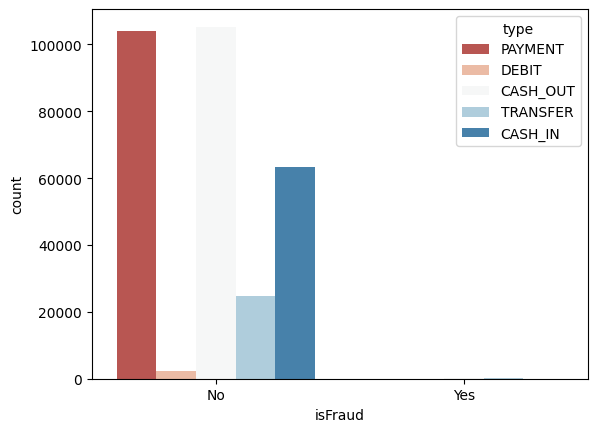

In [11]:
plt.figure()
sns.countplot(x = 'isFraud', hue = 'type', data = df, palette = 'RdBu')
plt.xticks([0,1], ['No','Yes'])
plt.show()

Veri setimizde yer alan banka işlemlerinde meydana gelen dolandırıcılık vakalarının dağılımına baktığımız zaman genel büyük çoğunlukla herhangi bir dolandırıcılık durumu yaşanmadığını görüyoruz.

In [12]:
df.drop('nameOrig',axis=1, inplace=True)
df.drop('nameDest',axis=1, inplace=True)

Veri setimde bulunan banka işlemlerini başlatan müşteri ve işlemin hedefindeki müşteri bilgilerini içeren **nameOrig** ve **nameDest** değerlerini sütunları veri setimden **drop()** fonksiyonunu kullanarak çıkarıyorum.

In [13]:
df

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,170136.00,160296.36,0.00,0.00,0,0
1,1,PAYMENT,1864.28,21249.00,19384.72,0.00,0.00,0,0
2,1,TRANSFER,181.00,181.00,0.00,0.00,0.00,1,0
3,1,CASH_OUT,181.00,181.00,0.00,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,41554.00,29885.86,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...
299995,15,CASH_IN,69228.40,18379025.16,18448253.56,1831300.18,1762071.77,0,0
299996,15,CASH_IN,200143.48,18448253.56,18648397.04,858556.85,658413.37,0,0
299997,15,CASH_IN,517617.12,18648397.04,19166014.16,744758.38,227141.26,0,0
299998,15,CASH_IN,30218.42,19166014.16,19196232.59,3530567.97,3500349.54,0,0


Görüldüğü üzere ilgili satırlar veri setimden çıkarıldı.

In [15]:
le = LabelEncoder()
df['type'] = le.fit_transform(df['type'])

İlk başta bahsettiğim gibi **type** değişkenimi label encoder kullanarak istediğim formata dönüştürüyorum.

In [16]:
knn_model = KNeighborsClassifier(n_neighbors = 3)

Scikit-Learn kütüphanemiz üzerinden KNN algoritmamızı kullanarak knn modelimi oluşturuyorum ve kullanacağı komşuluk değerini (n_neighbors) 3 olarak belirliyorum.

In [17]:
steps = [('knn', knn_model)]
pipeline = Pipeline(steps)

Data pipeline, farklı kaynaklardaki verileri yüklemek, dönüştürmek ve analiz etmek için atılan adımları içerir. Burada yalnızca Knn modelimizi kullanacağımız adımı içeren bir steps değişkeni kullanarak pipeline oluşturuyorum.

In [18]:
y = df['type'].values #hedef değişken
X = df.drop('type', axis = 1).values #tahmin değişkenleri
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

Hedef değişkenimi (type) ve tahmin değişkenlerini içeren X ve y adında değişkenler oluşturuyorum. Daha sonra **train_test_split()** metodunu kullanarak bu değişkenlerimi ayırma işlemini gerçekleştiriyorum. test_size değerini 0.3 olarak verdim, yani verimin %30 luk bir kısmını test için kullanacağım.

In [19]:
knn_pipeline = pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
accuracy_score(y_test, y_pred)

0.9194111111111111

Scikit_learn kütüphanesinden çağırdığımız accuracy_score metodu ile tahmin başarı oranımızın %91.94 olduğunu görebiliyoruz.

Şimdi ise bu oranı yükseltebilmek için neler yapabileceğimize bakalım. 

Öncelikle burada belirlediğimiz n_neighbors değerinin daha yüksek olması, daha yüksek bir başarı oranı elde edilmesini sağlayabilir. Şimdi bunu bir deneyelim ve ne kadar fark edecek veya bir fark olacak mı görelim.

In [21]:
knn_model_2 = KNeighborsClassifier(n_neighbors = 7)
steps_2 = [('knn', knn_model_2)]
pipeline_2 = Pipeline(steps_2)
knn_pipeline_2 = pipeline_2.fit(X_train, y_train)
y_pred = pipeline_2.predict(X_test)
accuracy_score(y_test, y_pred)

0.9264777777777777

Görüldüğü gibi n_neighbors değerimi 7 olarak belirlediğim zaman başarım oranım %92.64 değerine yükseldi.

Başarım oranımı etkileyen bir diğer faktör ise veri setimin bölünmüş olduğu test ve train bölümleri. Şu anki modelimizde veri setimiz yalnızca tek bir şekilde %30 ve %70'lik kısımlara ayrılmış durumda. Yani elimizde tek bir senaryo var. Farklı ayrım durumlarını da gözlemlemek için ise **Cross-Validation(Çapraz Doğrulama)** tekniği kullanacağım. Kullanacağım yöntem **grid search cross-validation**. Bu yöntem her bir adımda farklı birer test ve train kümesi kullanırken **farklı bir n_neighbors** değeri ile de çalışmamızı sağlıyor.


In [22]:
parameters = {'knn__n_neighbors': np.arange(1, 30)}
cv = GridSearchCV(pipeline, param_grid=parameters, cv=5)

Kullanacağım parametre değerlerimi oluşturarak grid search cross-validation modelimi oluşturuyorum. Şimdi ise modelimizi çalıştıralım ve sonucu görelim.

In [23]:
cv.fit(X_train, y_train)
print("Tuned KNN Parameters: {}".format(cv.best_params_))
print("Best score is {}".format(cv.best_score_))

Tuned KNN Parameters: {'knn__n_neighbors': 6}
Best score is 0.9272476190476191


Tabi ki bu işlem bir önceki tek senaryolu diyebileceğimiz tahmin işlemimize göre çok daha uzun sürüyor. Burada başarım oranımızı **%92.72** olarak görüyoruz ve en iyi sonucu n_neighbors değeri **6** iken almış. Burada kullanılan ve belirleyici rol oynayan knn__n_neighbors, cv gibi parametrelerin değerleri genişletilerek daha iyi sonuçlar elde etmek mümkün olabilir.

**GÖZETİMSİZ ÖĞRENME (UNSUPERVISED LEARNING)**

Yukarıda Gözetimli Öğrenme (Supervised Learning) kısmında ilk başta incelemiştik ancak şimdi de veri setimize şöyle genel bir bakış yapalım ve öyle devam edelim.

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   step            300000 non-null  int64  
 1   type            300000 non-null  int32  
 2   amount          300000 non-null  float64
 3   oldbalanceOrg   300000 non-null  float64
 4   newbalanceOrig  300000 non-null  float64
 5   oldbalanceDest  300000 non-null  float64
 6   newbalanceDest  300000 non-null  float64
 7   isFraud         300000 non-null  int64  
 8   isFlaggedFraud  300000 non-null  int64  
dtypes: float64(5), int32(1), int64(3)
memory usage: 19.5 MB


In [26]:
df.describe()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,300000.000000,300000.00000,3.000000e+05,3.000000e+05,3.000000e+05,3.000000e+05,3.000000e+05,300000.000000,300000.0
mean,11.441470,1.73883,1.761708e+05,8.855676e+05,9.042820e+05,9.774525e+05,1.196709e+06,0.000603,0.0
std,2.639757,1.34443,3.016055e+05,2.849254e+06,2.886694e+06,2.369811e+06,2.594207e+06,0.024555,0.0
min,1.000000,0.00000,3.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0
25%,10.000000,1.00000,1.274125e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0
50%,12.000000,1.00000,7.769952e+04,1.856900e+04,0.000000e+00,8.616686e+04,1.908220e+05,0.000000,0.0
75%,14.000000,3.00000,2.314789e+05,1.836875e+05,2.214797e+05,8.571552e+05,1.238132e+06,0.000000,0.0
max,15.000000,4.00000,1.000000e+07,3.893942e+07,3.894623e+07,4.133844e+07,4.138365e+07,1.000000,0.0


**K-Means Kümeleme (K-Means Clustering) Algoritması**

K-Means kümeleme yöntemi, bir veri setini verilen K parametresi kadarınca kümeye bölmektir. Buradaki amaç, bu işlem sonucunda elde edilen kümelerde, küme içi benzerliklerin maksimum düzeyde ve kümeler arasında ise minimum düzeyde olmasıdır. 

Her bir kümenin merkezini (ortalamasını) belirtmek üzere K adet nesne seçilir, kalanlar ise kümelere uzaklıklarına göre en benzer oldukları kümelere dahil edilir. Sonrasında ise yeni küme merkezleri belirlenir. Aynı adımlar kümeler kararlı hale gelinceye kadar devam eder.

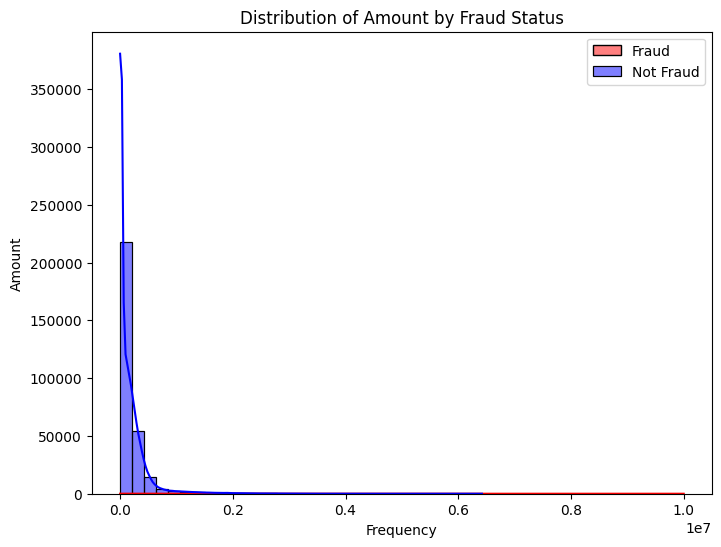

In [31]:
plt.figure(figsize=(8, 6))
sns.histplot(df[df['isFraud'] == 1]['amount'], color='red', label='Fraud', kde=True, bins=30)
sns.histplot(df[df['isFraud'] == 0]['amount'], color='blue', label='Not Fraud', kde=True, bins=30)
plt.title('Distribution of Amount by Fraud Status')
plt.xlabel('Frequency')
plt.ylabel('Amount')
plt.legend()
plt.show()

Dolandırıcılık vakası yaşanmasının tutara göre dağılımına baktığımız zaman, işlemlerin genelde isFraud değerinin 0 olduğunu yani herhangi bir dolandırıcılık durumu yaşanmadığı yönünde bir çıkarım yapabiliriz.

**Korelasyon Matrisi(Correlation Matrix)**

**Korelasyon matrisi**, farklı değişkenler için korelasyon katsayılarını içeren bir tablodur. Matris, bir tablodaki tüm olası değer çiftlerinin **birbirleriyle nasıl ilişkili** olduğunu gösterir. Büyük bir veri setini özetlemek ve verilerdeki kalıpları bulmak ve göstermek için güçlü bir araçtır.

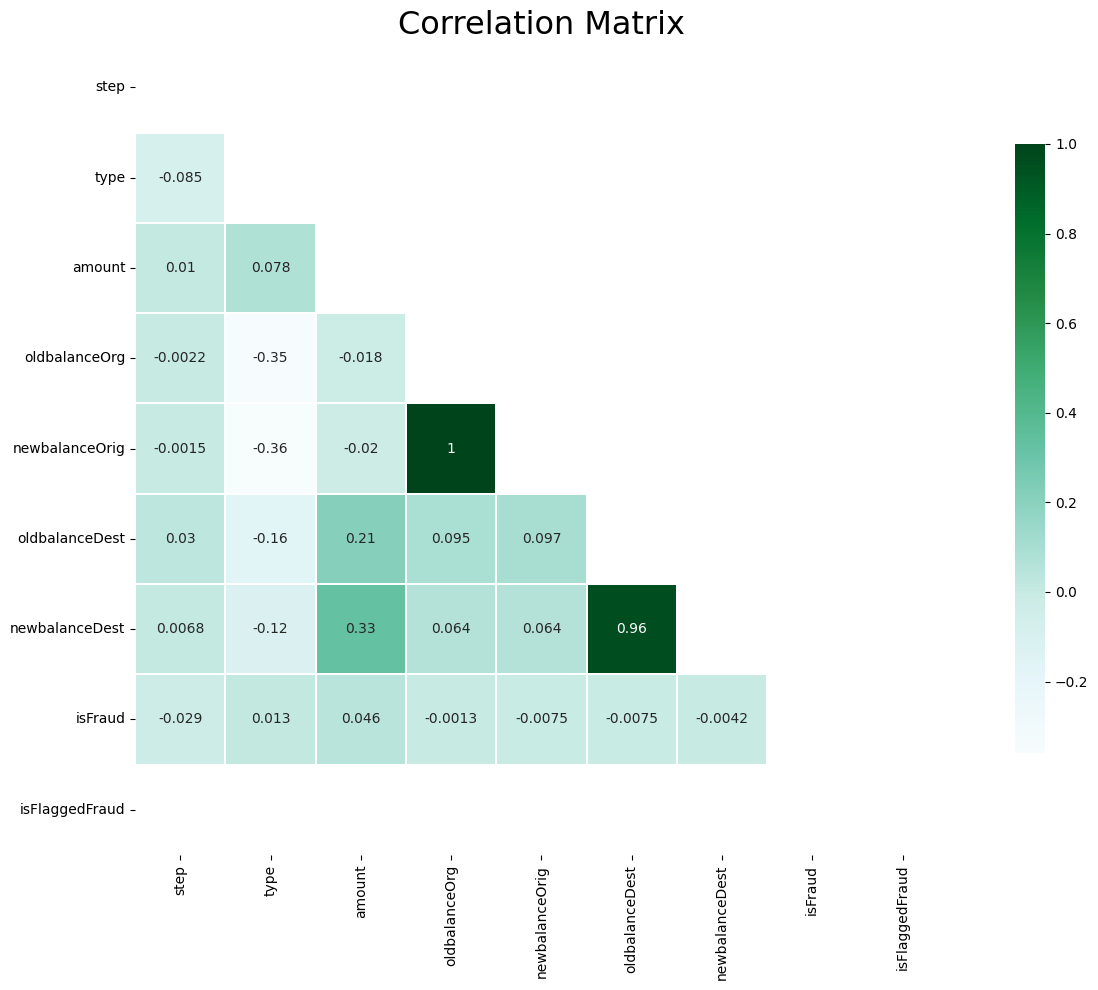

In [36]:
mask = np.zeros_like(df.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(14, 10))
plt.title('Correlation Matrix',fontsize=23)

sns.heatmap(df.corr(),linewidths=0.25, vmax=1.0, square=True, cmap="BuGn",
            linecolor='w', annot=True, mask=mask, cbar_kws={"shrink": .75})
f.tight_layout()

Görüldüğü üzere Korelasyon Matrisimde **newbalanceOrig** ve **oldbalanceOrg** değişkenlerim arasında **tam pozitif**, **newbalanceDest** ve **oldbalanceDest** değişkenleri arasında da **0.96** değeri ile yüksek pozitif bir korelasyon değeri var, tabi ki bu beklenen ve zaten böyle olması gereken bir durum :D 
**newbalanceDest** ile **amount** arasında ise **0.33** değerinde bir pozitif korelasyon bulunduğu görülüyor. Şimdi ise bu korelasyon değerlerini bir grafikle görmeye çalışalım.              

Text(0.5, 0.98, 'Correlation Visualizations')

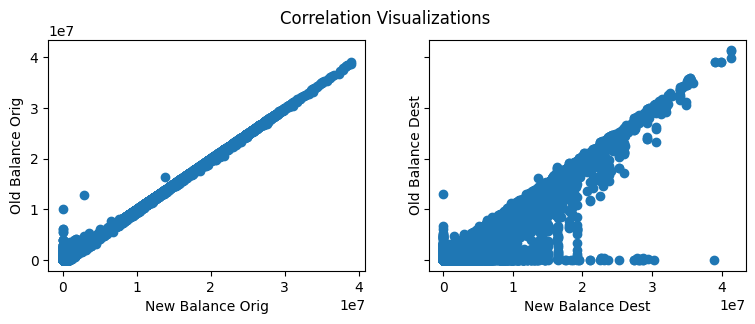

In [40]:
fig, axs = plt.subplots(1, 2, figsize=(9, 3), sharey=True)
axs[0].scatter(df["newbalanceOrig"].values, df["oldbalanceOrg"].values)
axs[0].set_xlabel('New Balance Orig')
axs[0].set_ylabel('Old Balance Orig')
axs[1].scatter(df["newbalanceDest"].values, df["oldbalanceDest"].values)
axs[1].set_xlabel('New Balance Dest')
axs[1].set_ylabel('Old Balance Dest')
fig.suptitle('Correlation Visualizations')

Text(0, 0.5, 'Type')

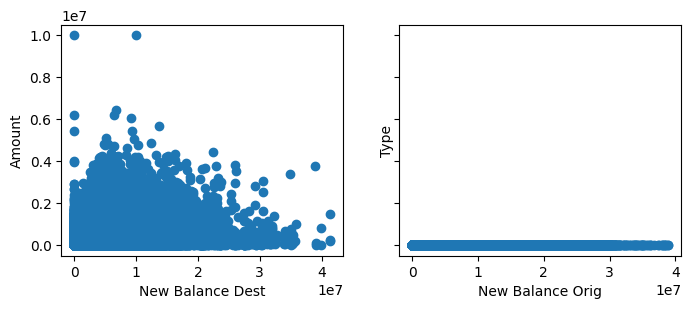

In [47]:
fig, axs = plt.subplots(1, 2, figsize=(8, 3), sharey=True)
axs[0].scatter(df["newbalanceDest"].values, df["amount"].values)
axs[0].set_xlabel('New Balance Dest')
axs[0].set_ylabel('Amount')
axs[1].scatter(df["newbalanceOrig"].values, df["type"].values)
axs[1].set_xlabel('New Balance Orig')
axs[1].set_ylabel('Type')

**Centroid ve Inertia**

K-Means algoritması ile elde edeceğimiz K adet kümenin her birinin ağırlık merkezleri **centroid** olarak adlandırılır. Bu merkezler en iyi şekide seçildiğinde ise **inertia (kayıp değeri)** minimize edilmiş olur.

İdeal küme sayısını bulmak için ise **dirsek metodunu** kullanalım.

In [48]:
scaler = StandardScaler()
df_dropped = df.drop('type', axis=1)
X = df_dropped.values[:, 1:]
scaled_x = scaler.fit_transform(X)

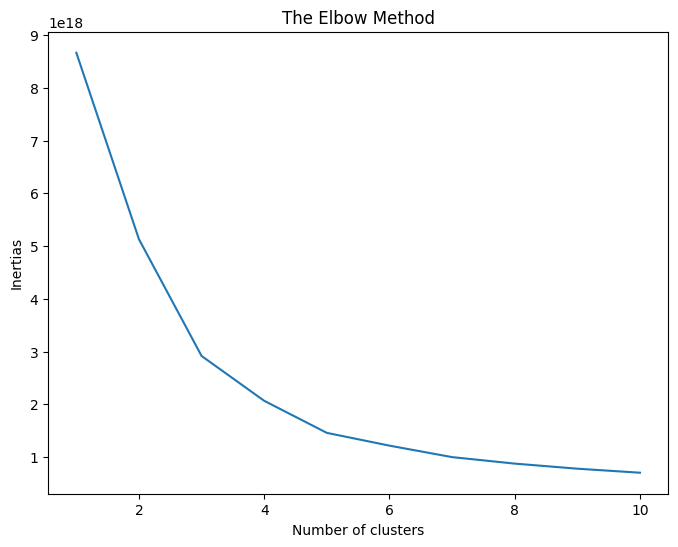

In [49]:
inertias = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300, n_init=12, random_state=0)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)
f3, ax = plt.subplots(figsize=(8, 6))
plt.plot(range(1,11),inertias)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertias')
plt.show()

3 değerinden sonra **inertia** değerinin düşme hızı azalıyor, yani küme sayımızı 3 olarak belirleyebiliriz.

In [50]:
model = KMeans(n_clusters=3)
training_points = scaled_x[:180000]
test_points = scaled_x[180000:]
model.fit(training_points)
labels = model.predict(test_points)

Hazırlamış olduğumuz K-Means modeli, veri setinin ilk 180.000 değerini eğitim için kullanarak kalan 120.000 değeri de buradan elde ettiği sonuçlara göre sınıflandıracak.

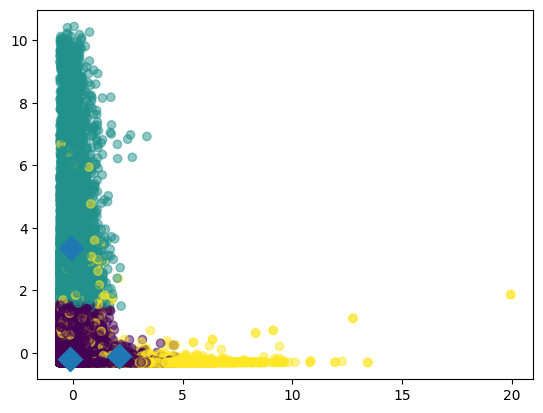

In [53]:
xs = test_points[:,0]
ys = test_points[:,1]

# Make a scatter plot of xs and ys, using labels to define the colors
plt.scatter(xs, ys, c=labels, alpha=0.5)

# Assign the cluster centers: centroids
centroids = model.cluster_centers_

# Assign the columns of centroids: centroids_x, centroids_y
centroids_x = centroids[:,0]
centroids_y = centroids[:,1]

# Make a scatter plot of centroids_x and centroids_y
plt.scatter(centroids_x, centroids_y, marker='D',s=150)
plt.show()

Oluşturduğu kümelerin ağırlık merkezleri grafikte mavi karelerle görülüyor. İlk bakışta düzgün kümelenmiş olarak görünüyor ancak bazı yerlerde renklerde karışmalar da mevcut. Bunu iyileştirmek için **PCA (Principal Component Analysis)** kullanarak **Boyut Azaltma** işlemini gerçekleştirelim.

Bu teknikte gerçekleştireceğimiz şey, verimizdeki önemli bilgileri içeren bileşen (içsel boyut) sayısını bularak veri setindeki özellikleri bu sayıya indirmek olacak. 

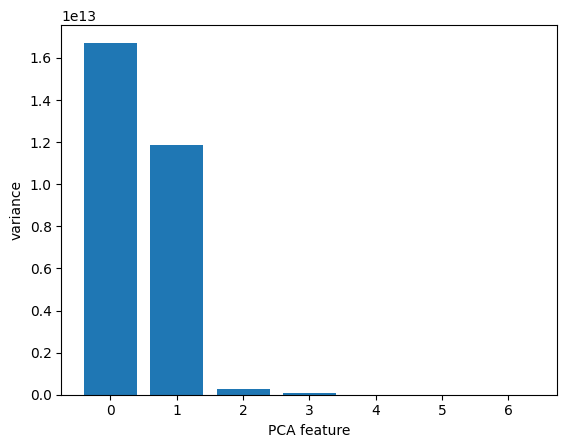

In [56]:
pca = PCA()
pca.fit(X)

features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_)
plt.xlabel('PCA feature')
plt.ylabel('variance')
plt.xticks(features)
plt.show()

Burada görüyoruz ki, aslında kullandığımız veri seti **içsel olarak 3 boyutludur** diyebiliriz gibi görünüyor. Yani veri setimizdeki özelliklerimizden büyük bir bölümü işimize yarar bilgi içermiyor.

In [59]:
pca = PCA(n_components=3)
pca.fit(X)
print(pca.explained_variance_ratio_)
print(sum(pca.explained_variance_ratio_))

[0.57873528 0.40989181 0.00891801]
0.9975450987594457


Görüldüğü üzere bileşen sayısını 3 olarak belirlediğimde, toplam bilginin **%99.75** kadarını koruyabildiğimi görüyorum.

In [61]:
pca = PCA(n_components=3)
pca.fit(scaled_x)
pca_features = pca.transform(scaled_x)

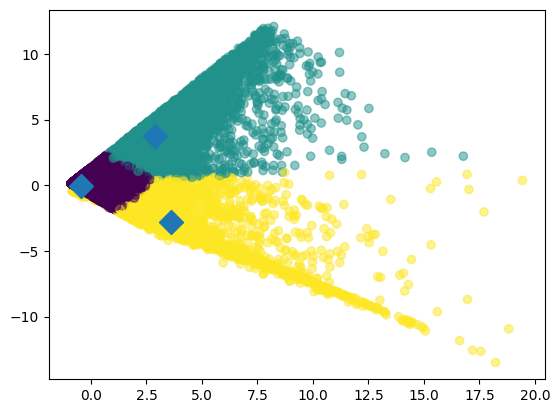

In [63]:
model = KMeans(n_clusters=3)
training_points = pca_features[:180000]
test_points = pca_features[180000:]
model.fit(training_points)
labels = model.predict(test_points)
xs = test_points[:,0]
ys = test_points[:,1]

plt.scatter(xs, ys, c=labels, alpha=0.5)

centroids = model.cluster_centers_

centroids_x = centroids[:,0]
centroids_y = centroids[:,1]

plt.scatter(centroids_x, centroids_y, marker='D',s=150)
plt.show()

Kümeler ve ağırlık merkezlerinin görünümü PCA öncesindeki denemeye göre çok daha iyi.

**MODEL DEĞERLENDİRMESİ**

In [78]:
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

Modelimizi değerlendirmek için Karmaşıklık Matrisi ve Sınıflandırma Raporu oluşturarak sonuçları inceleyebiliriz.

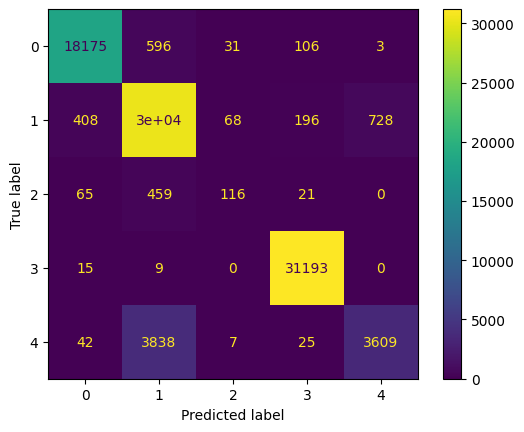

In [79]:
disp = ConfusionMatrixDisplay(confusion_matrix = conf_matrix)
disp.plot()

In [81]:
print(class_report)

              precision    recall  f1-score   support

           0       0.97      0.96      0.97     18911
           1       0.86      0.96      0.91     31690
           2       0.52      0.18      0.26       661
           3       0.99      1.00      0.99     31217
           4       0.83      0.48      0.61      7521

    accuracy                           0.93     90000
   macro avg       0.84      0.71      0.75     90000
weighted avg       0.92      0.93      0.92     90000



**Silhouette Skoru** 

Silhouette metodu, K-Means uygulandıktan sonra ortaya çıkan kümeler arasındaki ayrılma mesafesini yani kümeler arasındaki farklılığı incelemek için kullanılabilir. Silhouette grafiği, bir kümedeki her noktanın komşu kümelerdeki noktalara ne kadar uzak olduğunun bir ölçüsünü [-1,1] aralığında gösterir ve böylece küme sayısı gibi parametreleri görsel olarak değerlendirmenin bir yolunu sunar.

1'e yakın Silhouette katsayıları, aynı küme içindeki verilerin komşu kümelerden uzak olduğunu gösterir. 0 değeri ise verilerin iki komşu küme arasındaki karar sınırında veya çok yakın olduğunu gösterir. Negatif değerler, bu verilerin yanlış kümeye atanmış olabileceğini gösterir.

In [85]:
sample_indices = np.random.choice(test_points.shape[0], 100000, replace=False)# Random 10000 örnek seç
sample_points = test_points[sample_indices]
sample_labels = labels[sample_indices]

silhouette_avg = silhouette_score(sample_points, sample_labels)
print(f'Silhouette Score (Sampled): {silhouette_avg}')

Silhouette Score (Sampled): 0.7640471969388865


Rastgele 100.000 adet değer seçerek hesaplandığında, modelimiz için Silhouette Skoru **0.76** olarak çıkıyor. (Rastgele veriler seçildiğinden, her çalıştırıldığında veya değer sayısı değiştirildiğinde bu sonuç değişiyor ancak her seferidne 0.76 üzerinde bir değer elde ettim.) Bu da demek oluyor ki veri kümelerimizin birbirine olan uzaklığı yani aralarındaki farklılık değeri 0.76. Model daha da iyileştirirldiğinde tabi ki bu değer de 1 e daha çok yaklaşacaktır.